In [ ]:
!pip install geopandas

In [ ]:
!pip install rasterio

In [ ]:
import pandas as pd
import numpy as np
#import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt
from scipy import fftpack
from scipy import stats
import rasterio as rio
from rasterio.plot import show # plotting raster data
from rasterio.plot import show_hist #histograms of raster data

#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

from matplotlib import cm
import random
import warnings

import matplotlib.image as mpimg
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/S2_PCA_data

/content/drive/My Drive/S2_PCA_data


In [ ]:
ax1 =  gpd.read_file("class1.shp").dropna()
ax2 =  gpd.read_file("class2.shp").dropna()
ax3 =  gpd.read_file("class3.shp").dropna()
ax4 =  gpd.read_file("class4.shp").dropna()
ax5 =  gpd.read_file("class5.shp").dropna()
ax6 =  gpd.read_file("class6.shp").dropna()
ax7 =  gpd.read_file("class7.shp").dropna()
ax8 =  gpd.read_file("class8.shp").dropna()
ax9 =  gpd.read_file("class9.shp").dropna()
ax10 = gpd.read_file("class10.shp").dropna()
ax11 = gpd.read_file("class11.shp").dropna()
ax12 = gpd.read_file("class12.shp").dropna()
ax13 = gpd.read_file("class13.shp").dropna()
ax14 = gpd.read_file("class14.shp").dropna()

In [ ]:
ax1["jday"] = 91
ax2["jday"] = 92
ax3["jday"] = 93
ax4 ["jday"] = 94
ax5 ["jday"] = 95
ax6 ["jday"] = 96
ax7 ["jday"] = 97
ax8 ["jday"] = 98
ax9 ["jday"] = 99
ax10 ["jday"] = 100
ax11 ["jday"] = 101
ax12 ["jday"] = 102
ax13 ["jday"] = 103
ax14 ["jday"] = 104

In [ ]:
df = pd.concat([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14])

In [ ]:
df.loc[(df.icetype == 3), 'icetype'] = 3
df.loc[(df.icetype == 4), 'icetype'] = 4

In [ ]:
df = df.replace([1, 2, 3, 4], [1, 2, 3, 4])

In [ ]:
df = df.copy()
df= df.to_crs('epsg:3995')

In [ ]:
df['lat'] = df.centroid.y
df['lon'] = df.centroid.x
df.head(2)

,B10,B11,B12,icetype,B1,B2,B3,B4,B5,B6,B7,B8,B9,geometry,jday,lat,lon
1035,68.16581,616.760835,606.643404,3,8343.98269,8084.016894,7123.880063,7798.469934,7995.778489,8006.166422,7895.958657,7545.88426,3953.628514,"POLYGON ((-1370000.000 1111000.000, -1370000.0...",91,1.093898e+06,-1.358767e+06
1038,63.00000,550.000000,535.000000,2,7800.00000,7637.000000,6660.000000,7215.000000,7393.000000,7375.000000,7249.000000,6924.00000,3422.000000,"POLYGON ((-1277000.000 1134000.000, -1277000.0...",91,1.134500e+06,-1.276500e+06


In [ ]:
df = df[['B12','B11','B10','B9','B8','B7','B6','B5','B4','B3','B2','B1','icetype']]
df.head(3)

,B12,B11,B10,B9,B8,B7,B6,B5,B4,B3,B2,B1,icetype
1035,606.643404,616.760835,68.16581,3953.628514,7545.88426,7895.958657,8006.166422,7995.778489,7798.469934,7123.880063,8084.016894,8343.98269,3
1038,535.000000,550.000000,63.00000,3422.000000,6924.00000,7249.000000,7375.000000,7393.000000,7215.000000,6660.000000,7637.000000,7800.00000,2
1039,492.000000,507.000000,59.00000,3762.000000,6295.00000,6620.000000,6771.000000,6814.000000,6683.000000,6264.000000,7220.000000,8168.00000,2


In [ ]:
df.dropna()

,B12,B11,B10,B9,B8,B7,B6,B5,B4,B3,B2,B1,icetype
1035,606.643404,616.760835,68.165810,3953.628514,7545.884260,7895.958657,8006.166422,7995.778489,7798.469934,7123.880063,8084.016894,8343.982690,3
1038,535.000000,550.000000,63.000000,3422.000000,6924.000000,7249.000000,7375.000000,7393.000000,7215.000000,6660.000000,7637.000000,7800.000000,2
1039,492.000000,507.000000,59.000000,3762.000000,6295.000000,6620.000000,6771.000000,6814.000000,6683.000000,6264.000000,7220.000000,8168.000000,2
1040,565.000000,573.000000,55.000000,2992.000000,6975.000000,7306.000000,7416.000000,7425.000000,7241.000000,6636.000000,7586.000000,7194.000000,2
1041,531.000000,539.000000,67.000000,4048.000000,6880.000000,7201.000000,7310.000000,7319.000000,7137.000000,6544.000000,7492.000000,8293.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,711.000000,724.000000,65.000000,3905.000000,7643.000000,7969.000000,8049.000000,8015.000000,7785.000000,7069.000000,8041.000000,8393.000000,2
5,669.000000,683.500000,68.500000,3929.500000,7598.500000,7934.500000,8023.500000,7997.500000,7770.500000,7061.500000,8037.500000,8323.000000,1
6,615.500000,624.000000,70.000000,3973.500000,7638.000000,7969.000000,8065.500000,8037.000000,7810.000000,7100.500000,8075.500000,8304.000000,3
7,572.500000,584.500000,69.000000,3942.500000,7552.500000,7897.000000,8017.000000,8001.000000,7788.500000,7102.000000,8088.000000,8335.000000,3


In [ ]:
pca = PCA(4)

In [ ]:
xpca = (df.iloc[:, 0:12]).dropna()
pca.fit(xpca)

PCA(n_components=4)

In [ ]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.04582279 -0.03821094 -0.00638876 -0.2487393  -0.40674989 -0.40593464
  -0.39397548 -0.36943052 -0.34339084 -0.26545656 -0.26582726 -0.23142074]
 [ 0.02631772  0.03308043 -0.06776848 -0.92785144  0.0813615   0.14104555
   0.10266111  0.10530246  0.10560377  0.11101899  0.14753324 -0.19831115]
 [ 0.01413875  0.00463869  0.07969229  0.23249772  0.16276723  0.07823122
   0.09261704  0.08644441  0.05489957 -0.02392233 -0.0784021  -0.93860298]
 [ 0.4083082   0.39386426 -0.04911475 -0.06515699  0.38547035  0.30617216
   0.03107114 -0.10377166 -0.20916279 -0.40148913 -0.44787916  0.1090714 ]]
[754172.93344417  33780.44252868  11075.95379413   4839.62298998]


In [ ]:
B = pca.transform(xpca)
#print(B)

In [ ]:
scaler = StandardScaler()
scaler.fit(xpca)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(xpca)

In [ ]:
pca = PCA(n_components=4)
pca.fit(scaled_data)

PCA(n_components=4)

In [ ]:
x_pca = pca.transform(scaled_data)
#x_pca

In [ ]:
x_pca[:,0],x_pca[:,1]

(array([-7.03772619e-01,  5.37130925e+00,  8.97302108e+00,  6.25251843e+00,
         4.85927610e+00,  9.37757620e+00,  6.29844976e+00,  5.00322917e+00,
         9.67555882e+00,  7.52930825e+00,  7.48583743e+00,  4.61066528e+00,
         6.39763812e+00,  4.21328791e+00,  1.23463623e+00,  1.16972010e+01,
         5.28918011e+00,  5.19372302e+00,  8.73222560e+00,  6.38798666e+00,
         1.78820597e+01,  1.05721806e+01,  1.14458181e-01,  1.80969976e-01,
        -1.62138067e+00,  9.06500936e+00, -1.89734476e+00, -1.72600621e+00,
         6.78566192e+00, -1.42465405e+00, -1.13152875e+00, -7.43560987e-01,
        -1.32209587e+00, -1.97488035e+00, -2.02599304e+00, -5.21996124e-01,
        -1.74248638e+00, -1.23032341e+00, -1.14291903e+00, -1.38876481e+00,
        -1.80025419e+00, -1.82896493e+00, -1.87983412e+00, -1.47139521e+00,
        -1.10101001e+00, -1.48129900e+00, -9.21677635e-01,  1.55416900e+00,
         8.96184583e-02, -1.00956500e+00,  2.91585705e+00, -1.69386173e+00,
        -2.5

Text(0.5, 1.0, 'Principal components - Day1')

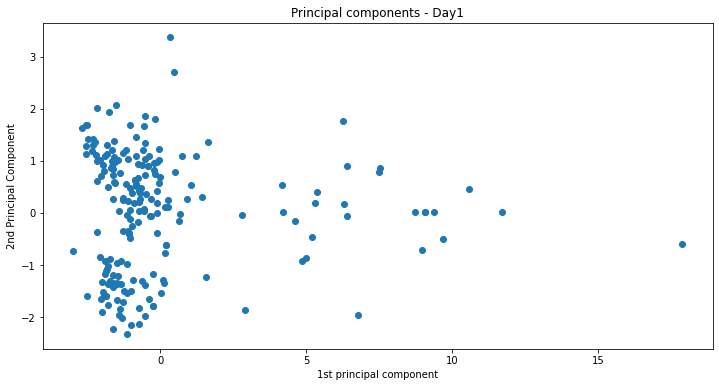

In [ ]:
figx = plt.figure(figsize=(12,6))
plt.scatter(x_pca[:,0],x_pca[:,1], cmap='rainbow')
plt.xlabel('1st principal component')
plt.ylabel('2nd Principal Component')
plt.title('Principal components - Day1')

<AxesSubplot:>

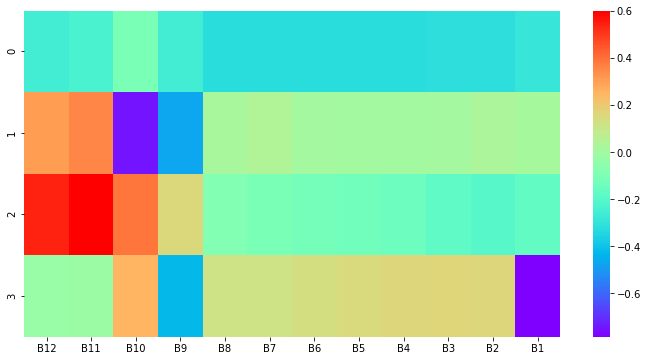

In [ ]:
map= pd.DataFrame(pca.components_,columns=['B12','B11','B10','B9','B8','B7','B6','B5','B4','B3','B2','B1']) 
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='rainbow')

In [ ]:
!pip install wavespectra

In [ ]:
from wavespectra import *

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
df.head(1)

,B10,B11,B12,icetype,B1,B2,B3,B4,B5,B6,B7,B8,B9,geometry,jday,lat,lon
1035,68.16581,616.760835,606.643404,3,8343.98269,8084.016894,7123.880063,7798.469934,7995.778489,8006.166422,7895.958657,7545.88426,3953.628514,"POLYGON ((-1370000.000 1111000.000, -1370000.0...",91,1.093898e+06,-1.358767e+06


In [ ]:
hh = rio.open('/content/drive/My Drive/DAY2/image_amunHH.tif')
hv = rio.open('/content/drive/My Drive/DAY2/image_amunHV.tif')

In [ ]:
ig = rio.open('/content/drive/My Drive/CAMEE_GRANT/classedimg_.tif')
ig2 = rio.open('/content/drive/My Drive/CAMEE_GRANT/classedimage.tif')

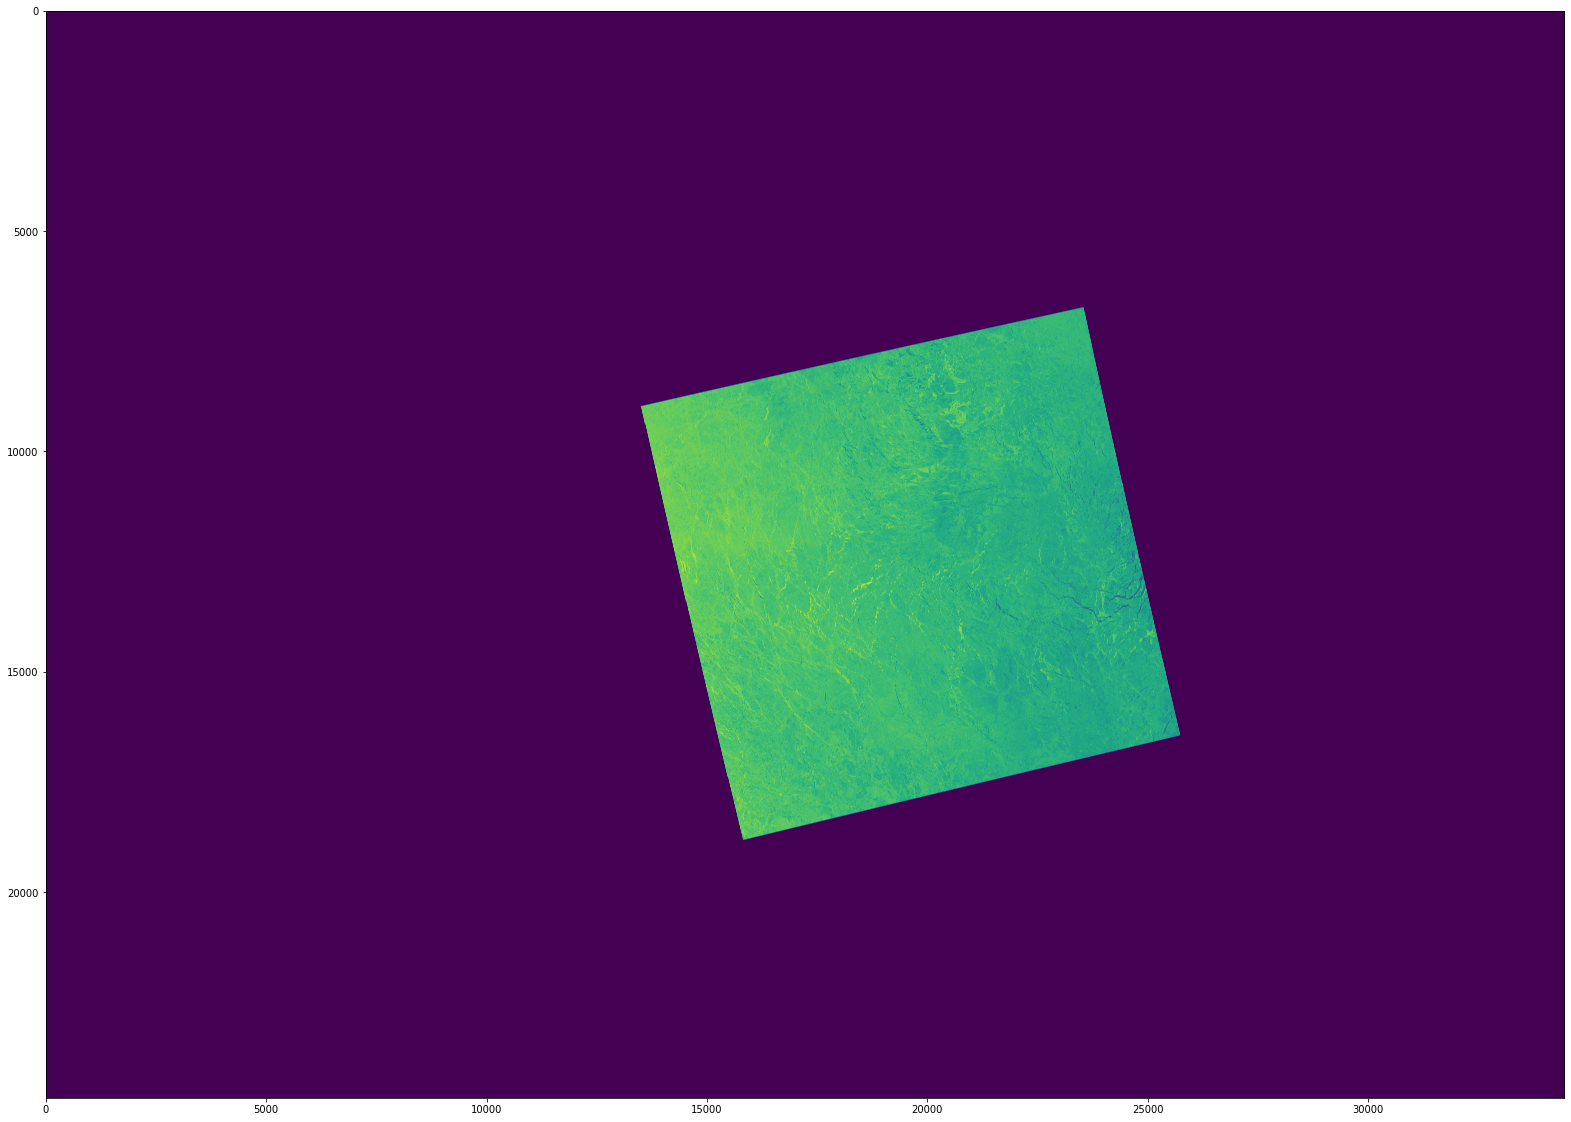

In [ ]:
mimo = ig2.read(1)
plt.figure(figsize=(30, 20))
plt.imshow(mimo);#cmap='inferno'

In [ ]:
#mim = rio.open('/content/drive/My Drive/MODIStest.tif')

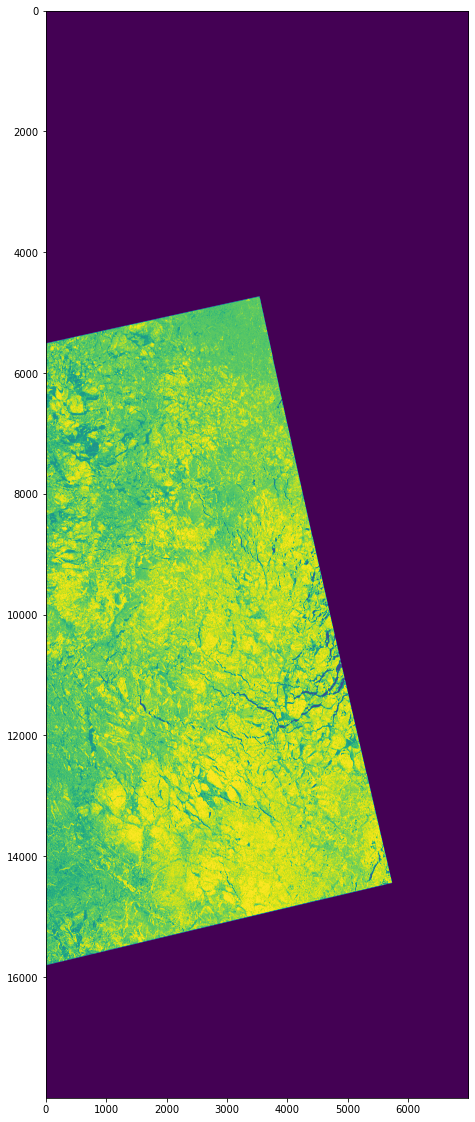

In [ ]:
mimo = ig.read(1)
plt.figure(figsize=(30, 20))
plt.imshow(mimo[2000:20000,20000:27000]);#cmap='inferno'

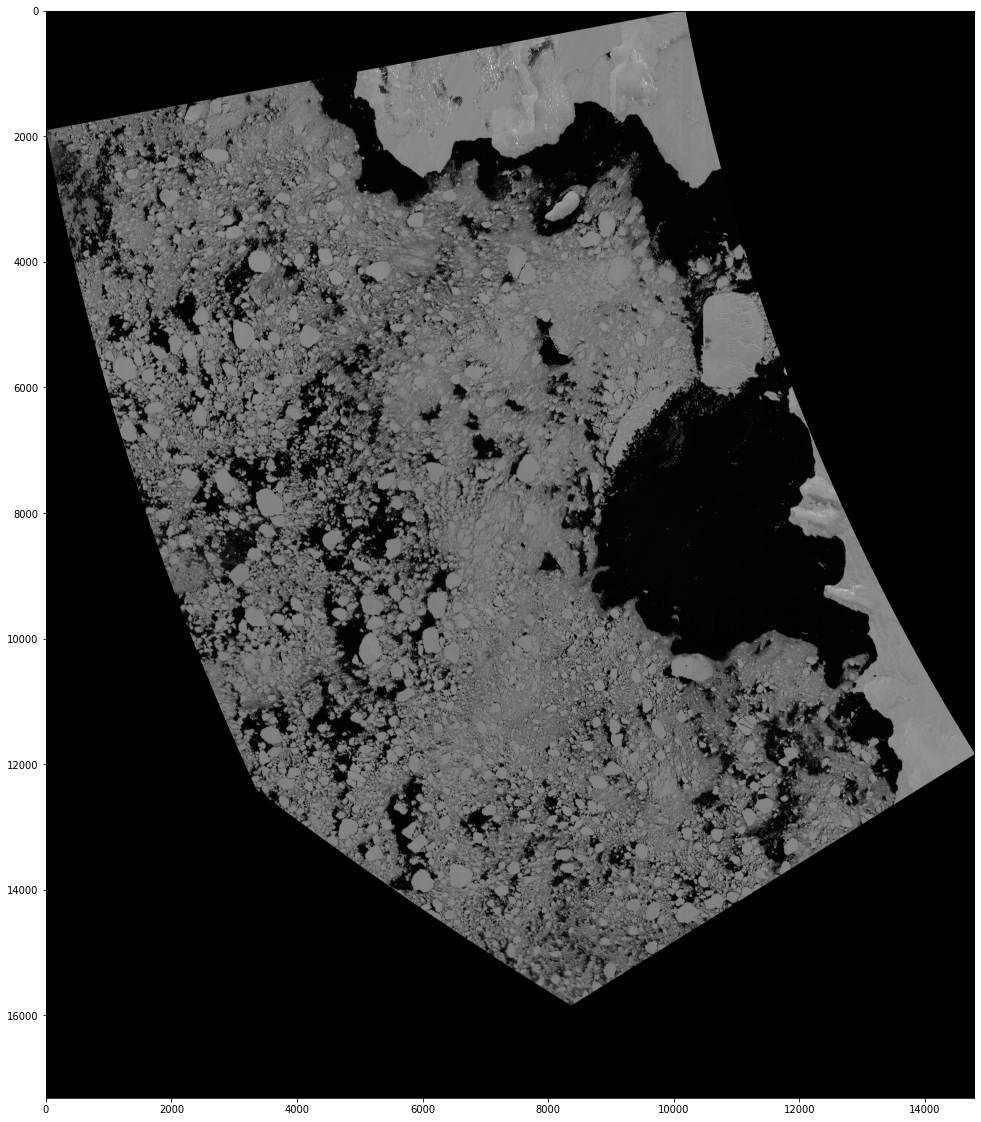

In [ ]:
mimo = mim.read(1)
plt.figure(figsize=(30, 20))
plt.imshow(mimo, cmap='gray');

In [ ]:
hh_array = hh.read(1)
hv_array = hv.read(1)

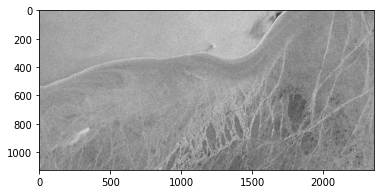

In [ ]:
plt.imshow(hh_array, cmap='gray');

In [ ]:
hhray = hh_array[800:1200,500:1250]
hvray = hv_array[800:1200,500:1250]

In [ ]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

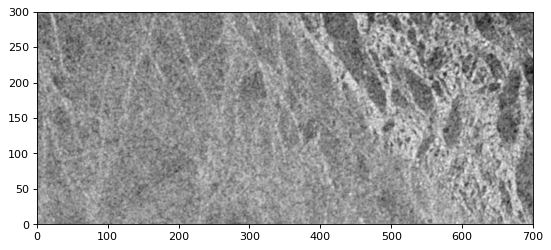

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(hhray, cmap='gray')
plt.axis([0, 700, 0, 300])
plt.savefig('/content/drive/My Drive/DAY2/hhray')

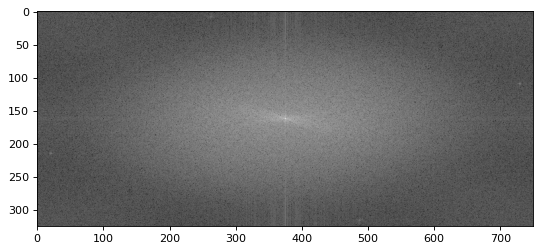

In [ ]:
fourierT = np.fft.fftshift(np.fft.fft2(hhray))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fourierT)), cmap='gray');

In [ ]:
print(fourierT)

[[  87.15819816 +59.36629911j  -26.40831385  -8.22037005j
    77.58396394 -23.47297036j ...   19.92381556-109.50050287j
     4.76841799 +10.72528627j  -28.50028458  -3.48020452j]
 [  32.43846829 -36.27272682j   27.15786789 +34.20308799j
    75.84644601 +22.83333312j ...   68.2131948  -30.05164885j
    -3.62585285 -41.59975552j  -44.88100222 +37.43175394j]
 [  16.19777985 -44.84035299j   21.82182367 -38.35258805j
    87.7986777  -50.43745495j ...  -91.60087661 +24.38655434j
  -108.78439101 +18.47988154j  -46.38859837 +77.84781314j]
 ...
 [  16.19777985 +44.84035299j  -46.38859837 -77.84781314j
  -108.78439101 -18.47988154j ...   61.44373805 +33.45017863j
    87.7986777  +50.43745495j   21.82182367 +38.35258805j]
 [  32.43846829 +36.27272682j  -44.88100222 -37.43175394j
    -3.62585285 +41.59975552j ...    0.37600892-135.14516823j
    75.84644601 -22.83333312j   27.15786789 -34.20308799j]
 [  87.15819816 -59.36629911j  -28.50028458  +3.48020452j
     4.76841799 -10.72528627j ...   94.007

In [ ]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(hhray))

    #For horizontal mask
    #dark_image_grey_fourier[235:240, :230] = i
    #dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(3,1,figsize=(30,30))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='inferno')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    #ax[0].grid(color='k', linestyle='-', linewidth=0.25)
    ax[1].imshow((hhray), cmap = 'viridis')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='inferno')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);

fourier_masker_ver(hhray, 1)

In [ ]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(hhray))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    #For horizontal mask
    #dark_image_grey_fourier[235:240, :230] = i
    #dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(3,1,figsize=(30,30))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='inferno')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow((hhray), cmap = 'viridis')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='inferno')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);

fourier_masker_ver(hhray, 1)

In [ ]:
! pip install pyfits

In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/')

In [ ]:
from scipy import fftpack
import pyfits
import pylab as py
import radialProfile

/usr/local/lib/python3.7/dist-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [ ]:
F1 = fftpack.fft2(hhray)

In [ ]:
F2 = fftpack.fftshift( F1 )

# Calculate a 2D power spectrum
psd2D = np.abs( F2 )**2

In [ ]:
k = abs(hhray)

In [ ]:
# Calculate the azimuthally averaged 1D power spectrum
psd1D = radialProfile.azimuthalAverage(psd2D)

In [ ]:
psd2D

array([[11120.90897724,   764.9735242 ,  6570.25179797, ...,
        12387.31855574,   137.76957564,   824.3780445 ],
       [ 2367.96493604,  1907.40101673,  6274.04447347, ...,
         5556.14154423,  1743.68646836,  3415.44056371],
       [ 2273.02532852,  1947.11299852, 10252.54466862, ...,
         8985.42462767, 12175.54974886,  8212.18406919],
       ...,
       [ 2273.02532852,  8212.18406919, 12175.54974886, ...,
         4894.24739616, 10252.54466862,  1947.11299852],
       [ 2367.96493604,  3415.44056371,  1743.68646836, ...,
        18264.35787803,  6274.04447347,  1907.40101673],
       [11120.90897724,   824.3780445 ,   137.76957564, ...,
        13899.36090905,  6570.25179797,   764.9735242 ]])

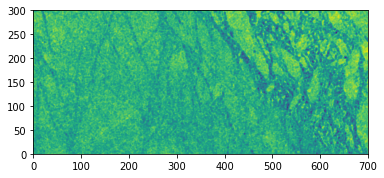

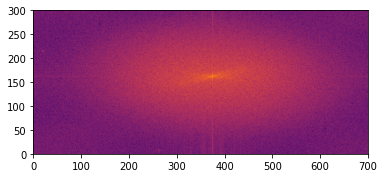

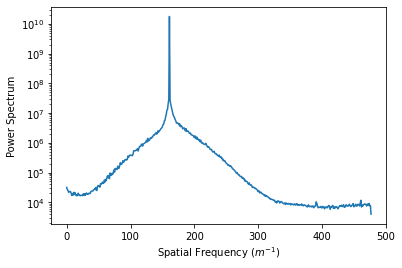

In [ ]:
py.figure(1)
py.clf()
py.imshow(np.log10(k),cmap=py.cm.viridis)
py.axis([0, 700, 0, 300])


py.figure(2)
py.clf()
py.imshow( np.log10(psd2D),cmap=py.cm.inferno)
#py.grid(color='k', linestyle='-', linewidth=0.5)
py.axis([0, 700, 0, 300])

py.figure(3)
py.clf()
py.semilogy(psd1D)
py.xlabel(r'Spatial Frequency ($m^{-1}$)')
py.ylabel('Power Spectrum')

py.show()


In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
pip install matplotlib-scalebar

In [ ]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib_scalebar.scalebar import ScaleBar